## 一 字典加载

In [3]:
measurements = [
    {'city': 'London', 'temperature': 33},
    {'city': 'Dubai', 'temperature': 22},
    {'city': 'Beijing', 'temperature': 32},
    ]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
print(vec.fit_transform(measurements).toarray())
vec.get_feature_names()

[[ 0.  0.  1. 33.]
 [ 0.  1.  0. 22.]
 [ 1.  0.  0. 32.]]


['city=Beijing', 'city=Dubai', 'city=London', 'temperature']

## 二 文本特征提取
### 1. 词频向量

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game, game over',
    'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words = 'english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 2 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'unc': 7, 'played': 5, 'duke': 2, 'basketball': 1, 'lost': 4, 'game': 3, 'ate': 0, 'sandwich': 6}


In [7]:
import jieba
corpus = [
    '朋友，小红是我的',
    '小明对小红说，我们还是不是朋友',
    '小明与小红是朋友'
]
cutcorps = ['/'.join(jieba.cut(x)) for x in corpus]
vectorizer = CountVectorizer(stop_words = ['好的','是的'])
counts = vectorizer.fit_transform(cutcorps).todense()
print(counts)
print(vectorizer.vocabulary_)

[[0 1 0 0 1]
 [1 1 1 1 1]
 [1 1 0 0 1]]
{'朋友': 4, '小红': 1, '小明': 0, '我们': 2, '是不是': 3}


In [5]:
from sklearn.metrics.pairwise import euclidean_distances
for x, y in [[0,1], [0,2],[1,2]]:
    dist = euclidean_distances(counts[x], counts[y])
    print('文档{}与文档{}的距离{}'.format(x, y, dist))

文档0与文档1的距离[[1.73205081]]
文档0与文档2的距离[[1.]]
文档1与文档2的距离[[1.41421356]]


### 2.tf-idf 权重向量
$$
Tfidf = Tf \times idf
$$
$$
idf = log( \frac{n_d}{1 + df})
$$

* Tf ---- Term frequncy词频
* idf ---- inverse document frequncy逆向文件词频
* n_d ---文集中文档总数
* df ---含有该单词的文档总数

最终，Tfidf再正则化为权重:
$$
x_{norm} = \frac{x}{{||x||}_2} = \frac{x}{\sqrt{x_1^2 + x_2^2 + \dots + x_n^2}}
$$

TfidfTransformer 将词频向量转为tf-idf权重向量

TfidVectorizer 将CountVectorizer 与TfidfTransformer的功能集成在一起

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer 
counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 1]]
transformer = TfidfTransformer(smooth_idf=False)
transformer.fit_transform(counts).toarray()

array([[0.84274417, 0.        , 0.53831428],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.47488312, 0.82611867, 0.30333804]])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
print(vectorizer.fit_transform(cutcorps).toarray())
print(vectorizer.vocabulary_)

[[0.         0.70710678 0.         0.         0.70710678]
 [0.42018292 0.32630952 0.55249005 0.55249005 0.32630952]
 [0.67325467 0.52284231 0.         0.         0.52284231]]
{'朋友': 4, '小红': 1, '小明': 0, '我们': 2, '是不是': 3}


## 三，特征哈希向量
词袋模型对于大词汇字典，可能内存存不下

In [14]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['tom cat', 'china', 'i ate a sadnwish ']
# HashingVectorizer 是无状态的，don`t need fit
vectorizer = HashingVectorizer(n_features=6, stop_words='english')

vectorizer.transform(corpus).todense()

matrix([[ 0.        ,  0.70710678,  0.        ,  0.        ,  0.        ,
          0.70710678],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         -1.        ],
        [ 0.        ,  0.        ,  0.70710678,  0.70710678,  0.        ,
          0.        ]])

In [15]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game, game over',
    'I ate a sandwich'
]
vectorizer = HashingVectorizer(n_features=6, stop_words='english')

counts = vectorizer.transform(corpus).todense()
print(counts)
counts.shape

[[ 0.         -0.40824829 -0.81649658  0.          0.         -0.40824829]
 [ 0.         -0.90453403 -0.30151134  0.          0.         -0.30151134]
 [ 0.          0.          0.70710678  0.70710678  0.          0.        ]]


(3, 6)

# 三，图像特征提取
1. 提取像素矩阵

In [17]:
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
imrgb = io.imread('./duolaameng.jpeg')
print('before reshape:', imrgb.shape)
#拼接为一个行向量
imvec = imrgb.reshape(1, -1)
print('after reshape:', imvec.shape)

before reshape: (182, 277, 3)
after reshape: (1, 151242)


Text(0.5, 1.0, 'blue channel')

<Figure size 432x288 with 0 Axes>

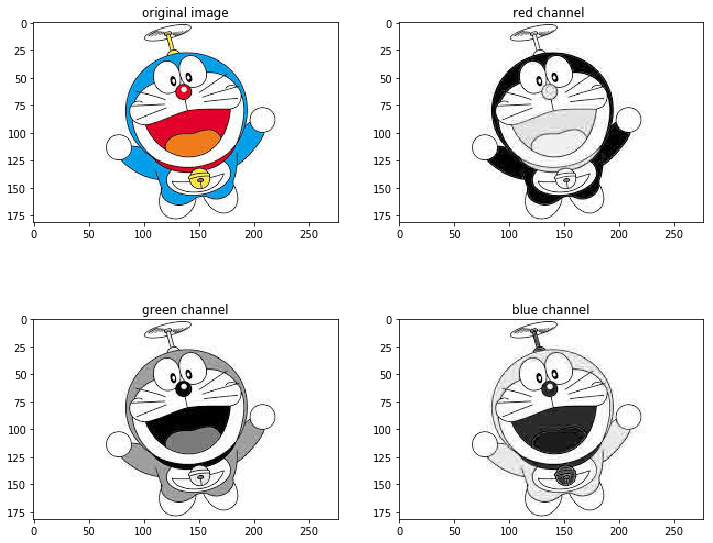

In [20]:
plt.gray()
fig, axes = plt.subplots(2, 2,figsize=(12,10))
ax0, ax1, ax2, ax3  = axes.ravel()
ax0.imshow(imrgb)
ax0.set_title('original image')

ax1.imshow(imrgb[:, :, 0])
ax1.set_title('red channel ')

ax2.imshow(imrgb[:, :, 1])
ax2.set_title('green channel')

ax3.imshow(imrgb[:, :, 2])
ax3.set_title('blue channel')

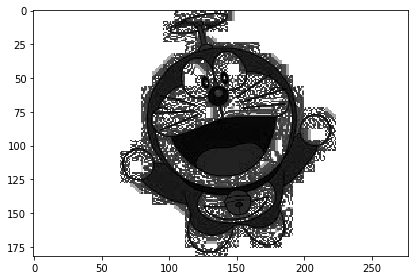

In [21]:
#gray
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

plt.gray()
imgray = equalize_hist(rgb2gray(imrgb))
io.imshow(imgray)

### 提取角点（兴趣点） for fun

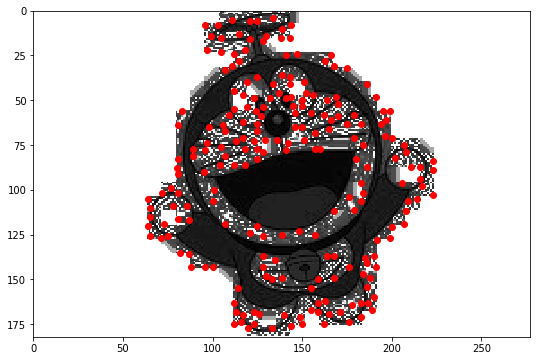

In [24]:
from skimage.feature import corner_harris, corner_peaks
import numpy as np
def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches() * 1.5))
    plt.show()
    
corners = corner_peaks(corner_harris(imgray), min_distance=2)
show_corners(corners, imgray)